# Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv("first_half_logs.csv", header=None,\
                   names=["timestamp", "tag_id", "x_pos", "y_pos", "heading", "direction", "energy", "speed","total_distance"])

# a

In [2]:
data_pos_mean = data.groupby("tag_id").mean()[["x_pos", "y_pos"]]
data_pos_mean = data_pos_mean.reset_index()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_background(axs, colorfull):
    
    rect1=Rectangle((0, 0), 105, 68, fill=colorfull, color="green", alpha=0.7,linewidth=2)
    rect2=Rectangle((0, 17), 15, 34, fill=False, color="black", alpha=0.5,linewidth=2)
    rect3=Rectangle((105-15, 17), 15, 34, fill=False, color="black", alpha=0.5,linewidth=2)

    axs.add_patch(rect1)
    axs.add_patch(rect2)
    axs.add_patch(rect3)

    axs.plot([52.5, 52.5], [0,68], color="black", alpha=0.5)
    axs.plot([0, 105], [68, 68], color="black")
    axs.plot([0, 105], [0, 0], color="black")
    axs.plot([0, 0], [0, 68], color="black")
    axs.plot([105, 105], [0, 68], color="black")    
    

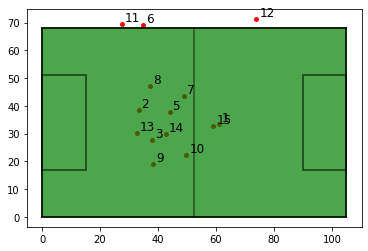

In [4]:
fig, axs = plt.subplots()

plot_background(axs=axs, colorfull=True)

axs.scatter(x=data_pos_mean["x_pos"], y=data_pos_mean["y_pos"], color="red", s=15)

for i, item in data_pos_mean.iterrows():
    axs.annotate(int(item["tag_id"]), (item["x_pos"]+1, item["y_pos"]+1), fontsize=12)

plt.show()

# b

In [5]:
data_cov = data.groupby("tag_id").cov().reset_index()
data_cov = data_cov[(data_cov["level_1"]=="x_pos") | (data_cov["level_1"]=="y_pos")]   
data_cov = data_cov[["tag_id","level_1","x_pos", "y_pos"]]

In [6]:
def cov_matrix(tag_id):
    data_cov_id = data_cov[data_cov["tag_id"]==tag_id]
    return np.array([[data_cov_id.iloc[0]["x_pos"], data_cov_id.iloc[0]["y_pos"]], [data_cov_id.iloc[1]["x_pos"], data_cov_id.iloc[1]["y_pos"]]])

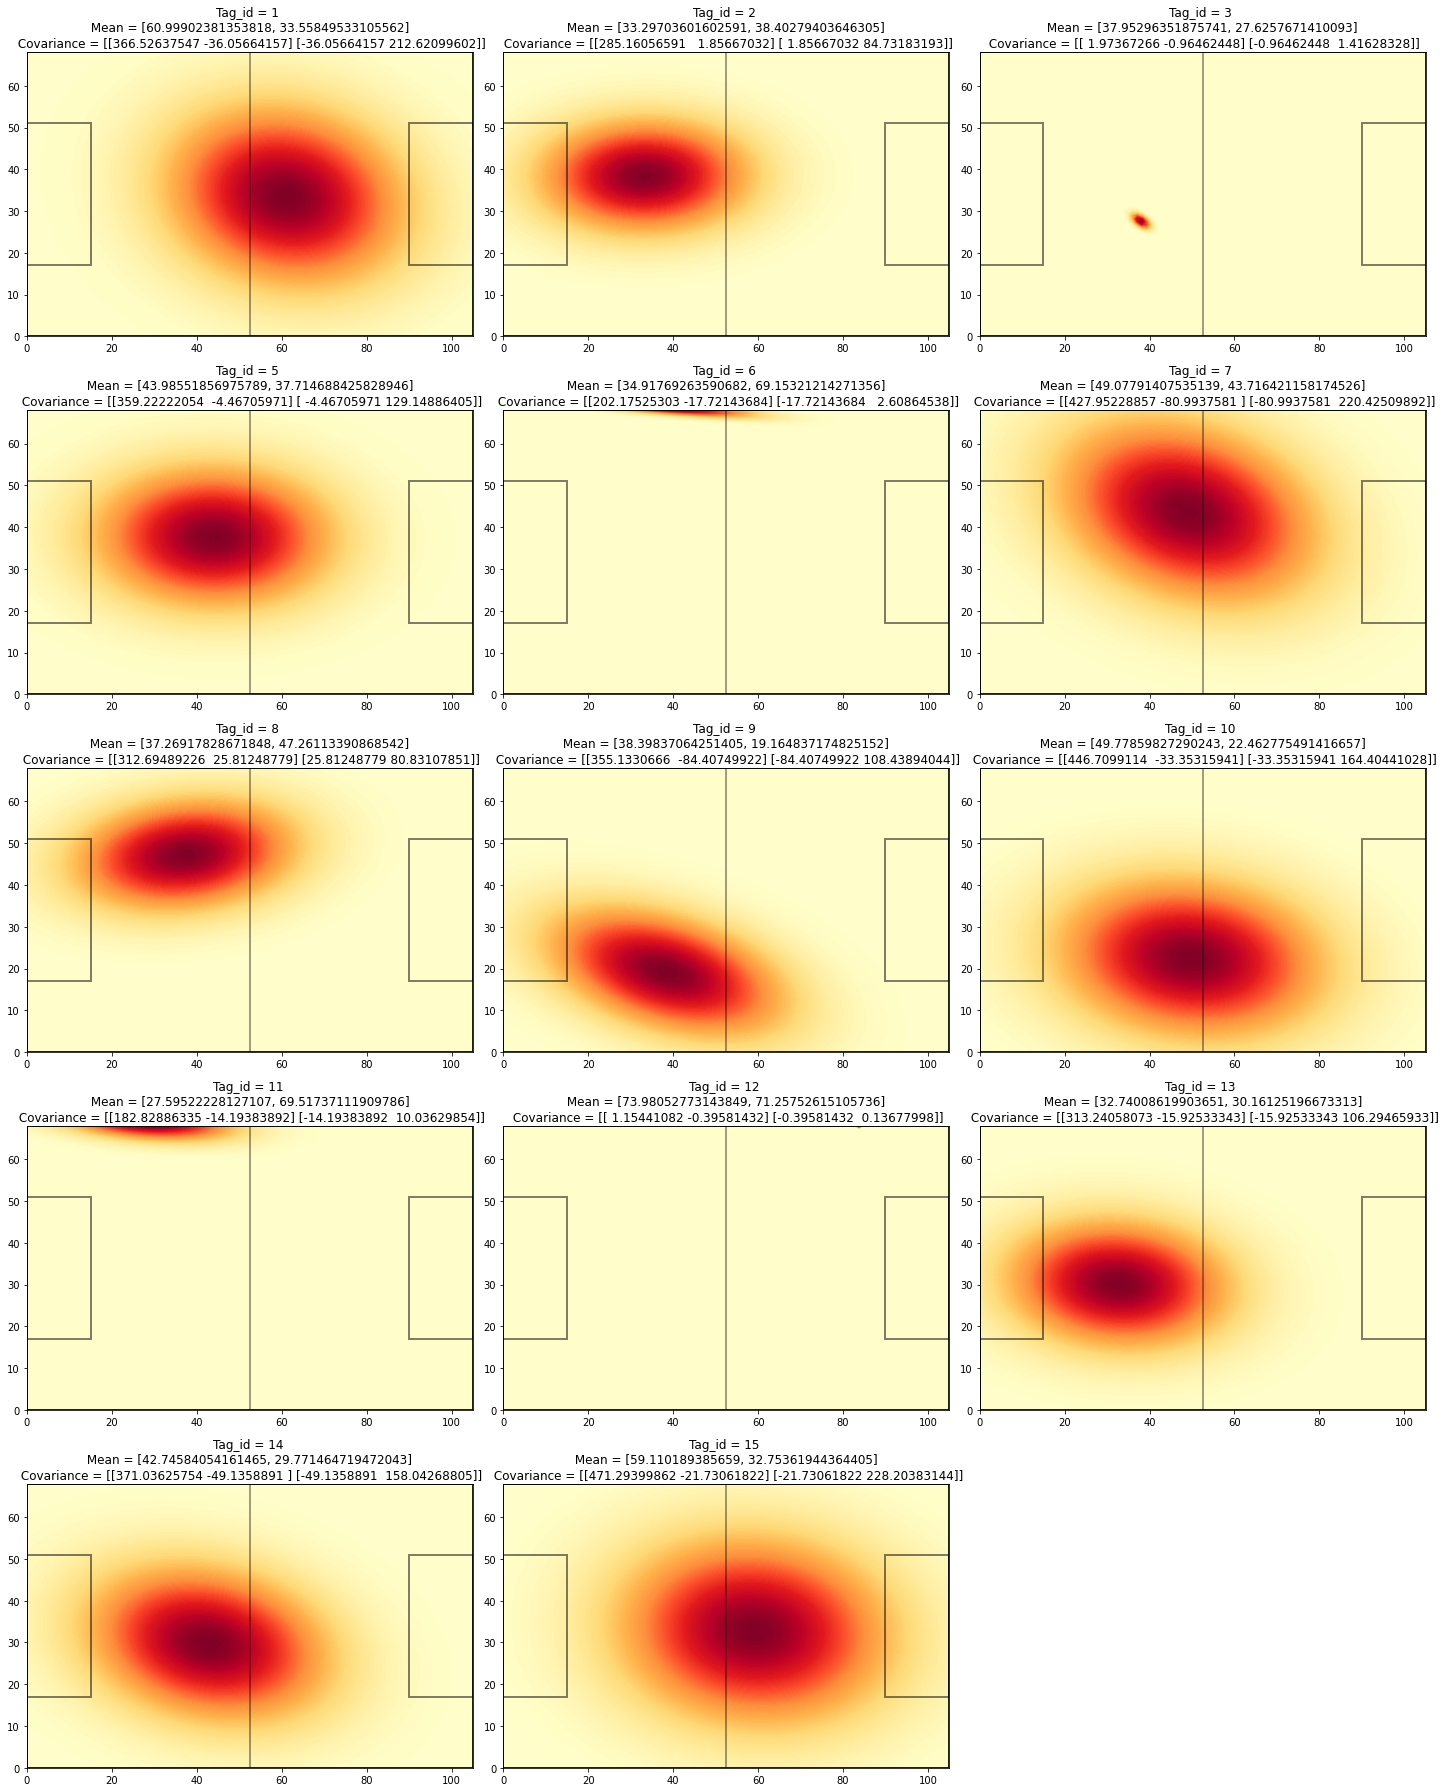

In [7]:
import numpy as np
size = 100

fig, axs = plt.subplots(5, 3)

for i, item in data_pos_mean.iterrows():

    x = np.linspace(0, 105, size)
    y = np.linspace(0, 68, size)
    
    mean_x = item["x_pos"]
    mean_y = item["y_pos"]
    tag_id = item["tag_id"]
    
    sigma = cov_matrix(tag_id=tag_id)
    
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    
    z = []
    maxim = 0
    maxim_arg = None
    
    for yi in y:
        zi = []
        for xi in x:
            xy_sub_mean = np.array([[xi-mean_x], [yi-mean_y]])        
            zij = np.exp(-1/2 * xy_sub_mean.T @ sigma_inv @ xy_sub_mean) / (2 * np.pi * np.sqrt(sigma_det))
            if zij > maxim:
                maxim = zij
                maxim_arg = [xi, yi]
            zi.append(float(zij))
            
        z.append(zi)
            
    z = np.array(z)

    xy_sub_mean = np.array([[mean_x-mean_x], [mean_y-mean_y]])        
    zij = np.exp(-1/2 * xy_sub_mean.T @ sigma_inv @ xy_sub_mean) / (2 * np.pi * np.sqrt(sigma_det))        
    
    x, y = np.meshgrid(x, y)

    plot_background(axs=axs[int(i/3)][i%3], colorfull=False)

    axs[int(i/3)][i%3].contourf(x, y, z, 100, cmap="YlOrRd")
    axs[int(i/3)][i%3].title.set_text(f"Tag_id = {int(tag_id)} \n Mean = {[mean_x, mean_y]} \n Covariance = [{sigma[0]} {sigma[1]}]")    

fig.delaxes(axs[4][2])
        
fig.set_size_inches(20,25)
fig.tight_layout()
plt.show()